## MNIST Digits Data Set

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

More details @
http://yann.lecun.com/exdb/mnist/

Also:

https://en.wikipedia.org/wiki/MNIST_database

In [1]:
#importing requited packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#reading the data file #train.csv

digits = pd.read_csv('train.csv')
digits.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#getting the data against a sample label

four = digits.iloc[3, 1:]
four.shape

(784,)

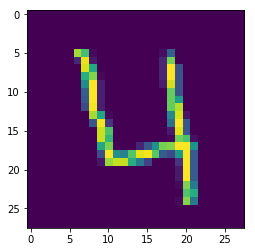

In [4]:
#getting the image
four = four.values.reshape(28,28)
plt.imshow(four)

In [9]:
#seeing the image for digit 3
three = digits.iloc[7, 1:]
three.shape

(784,)

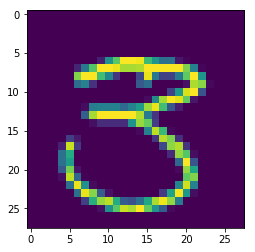

In [10]:
three = three.values.reshape(28,28)
plt.imshow(three)

In [11]:
#visualize the array
print(three[5:-5, 6:-3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  21 130 190 254 254 250 175 135  96  96  16   4   0   0   0
    0]
 [ 26 102 186 254 254 248 222 222 225 254 254 254 254 254 206 112   4   0
    0]
 [207 254 254 177 117  39   0   0  56 248 102  48  48 103 192 254 135   0
    0]
 [ 91 111  36   0   0   0   0   0  72  92   0   0   0   0  12 224 210   5
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  50 139 240 254  66   0
    0]
 [  0   0   0   0   0   0   0   0   0   7 121 220 254 244 194  15   0   0
    0]
 [  0   8 107 112 112 112  87 112 141 218 248 177  68  20   0   0   0   0
    0]
 [  0  77 221 254 254 254 254 254 225 104  39   0   0   0   0   0   0   0
    0]
 [  0   0  10  32  32  32  32 130 215 195  47   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   6 111 231 174   5   0   0   0   0   0
    0]
 [ 18   0   0   0   0   0   0   0   0   0  40 228 205  35   0   0   0   0
    0]
 [ 42   0   0   0   0   0   

### We can see a clear pattern for digit 3. 

In [15]:
#getting the label counts for digits
digits['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [19]:
#getting the percentage of digits in training dataset. It is quite and even data set
round(((digits['label'].value_counts())/len(digits))*100, 3)

1    11.152
7    10.479
3    10.360
9     9.971
2     9.945
6     9.850
0     9.838
4     9.695
8     9.674
5     9.036
Name: label, dtype: float64

### As we can see that the data is balanced so SVM can be a good choice (SVM is better for balanced data sets)

## Now we will check for missing values.

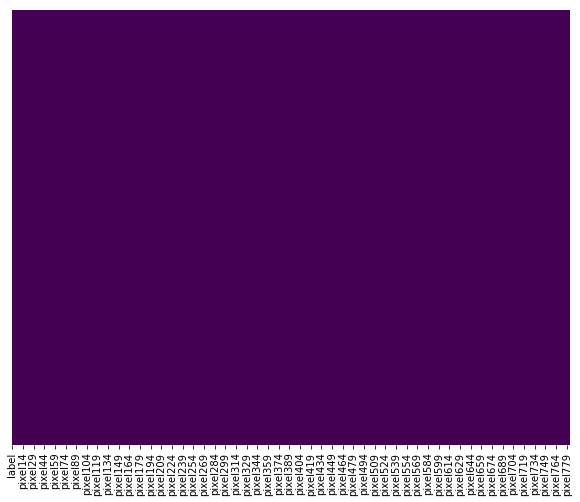

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(digits.isnull(), yticklabels=False, cbar= False, cmap= 'viridis')

In [21]:
#checking for nulls
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [22]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [25]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


## Getting X/y and applying the scaling

In [26]:
X = digits.drop(['label'],axis =1)
y = digits['label']

In [28]:
#scaling
from sklearn.preprocessing import scale
X = scale(X)
import warnings
warnings.filterwarnings('ignore')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
#importing the model
from sklearn import svm
from sklearn import metrics

In [31]:
svm_linear = svm.SVC(kernel= 'linear')

svm_linear.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
# predict
predictions = svm_linear.predict(X_test)
predictions[:10]

array([8, 1, 9, 7, 8, 6, 2, 2, 7, 1], dtype=int64)

#### Confusion Matrix

In [33]:
metrics.confusion_matrix(y_true= y_test, y_pred= predictions)

array([[1298,    0,    8,    2,    6,    5,   10,    0,    4,    0],
       [   0, 1490,    3,    4,    1,    3,    1,    3,   15,    0],
       [  16,   20, 1287,   28,   17,    5,   10,   10,   20,    1],
       [   7,    5,   45, 1301,    2,   60,    2,   10,   28,   11],
       [   6,    4,   13,    2, 1282,    4,    2,    5,    0,   40],
       [  14,    4,   10,   65,   18, 1057,   11,    2,   19,    5],
       [  21,    5,   20,    1,   15,   24, 1302,    2,    7,    0],
       [   0,    7,   20,   12,   23,    1,    0, 1364,    6,   47],
       [   9,   24,   28,   53,    8,   47,   10,    7, 1136,   12],
       [  10,    5,    9,   19,   48,   11,    0,   50,    8, 1188]],
      dtype=int64)

### Accuracy

In [36]:
metrics.accuracy_score(y_true= y_test, y_pred= predictions)

0.9166666666666666

In [38]:
class_report = metrics.classification_report(y_true= y_test, y_pred = predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1333
           1       0.95      0.98      0.97      1520
           2       0.89      0.91      0.90      1414
           3       0.87      0.88      0.88      1471
           4       0.90      0.94      0.92      1358
           5       0.87      0.88      0.87      1205
           6       0.97      0.93      0.95      1397
           7       0.94      0.92      0.93      1480
           8       0.91      0.85      0.88      1334
           9       0.91      0.88      0.90      1348

   micro avg       0.92      0.92      0.92     13860
   macro avg       0.92      0.92      0.92     13860
weighted avg       0.92      0.92      0.92     13860



In [39]:
# run gc.collect() (garbage collect) to free up memory
gc.collect()

8062

## Non Linear SVM

In [40]:
svm_rbf = svm.SVC(kernel= 'rbf')
svm_rbf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
gc.collect()

2611

In [42]:
predictions = svm_rbf.predict(X_test)
predictions[:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1], dtype=int64)

In [43]:
metrics.confusion_matrix(y_test,predictions)

array([[1308,    0,    8,    1,    2,    3,    7,    1,    3,    0],
       [   0, 1494,   13,    2,    1,    1,    1,    3,    4,    1],
       [   6,    4, 1368,    6,    7,    0,    3,    6,   13,    1],
       [   3,    5,   20, 1385,    0,   18,    0,   14,   20,    6],
       [   2,    0,   19,    0, 1302,    2,    7,    4,    1,   21],
       [   3,    1,   14,   26,    1, 1131,   16,    5,    6,    2],
       [  11,    2,   18,    0,    6,    9, 1345,    0,    6,    0],
       [   0,    9,   24,    6,   15,    1,    0, 1396,    2,   27],
       [   2,    7,   14,   15,    6,   12,    7,    2, 1264,    5],
       [   5,    3,   15,   15,   22,    1,    0,   27,    8, 1252]],
      dtype=int64)

In [44]:
metrics.accuracy_score(y_test,predictions)

0.9556277056277056

In [45]:
class_rep_rbf = metrics.classification_report(y_test,predictions)
print(class_rep_rbf)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1333
           1       0.98      0.98      0.98      1520
           2       0.90      0.97      0.93      1414
           3       0.95      0.94      0.95      1471
           4       0.96      0.96      0.96      1358
           5       0.96      0.94      0.95      1205
           6       0.97      0.96      0.97      1397
           7       0.96      0.94      0.95      1480
           8       0.95      0.95      0.95      1334
           9       0.95      0.93      0.94      1348

   micro avg       0.96      0.96      0.96     13860
   macro avg       0.96      0.96      0.96     13860
weighted avg       0.96      0.96      0.96     13860



### The accuracy has improved after using a non-linear kernel.

## Grid Search CV

In [46]:
# Now we will use the Grid Search for hyper parameter tuning.

from sklearn.model_selection import GridSearchCV

params = {'C': [1,10,100], 'gamma': [1e-2, 1e-3, 1e-4]}


clf = GridSearchCV(estimator= svm.SVC(kernel= 'rbf'), param_grid= params, return_train_score= True, scoring= 'accuracy')

clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [47]:
#getting the results
cv_results = pd.DataFrame(clf.cv_results_)

In [48]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,531.551154,70.101183,126.392928,20.836611,1,0.01,"{'C': 1, 'gamma': 0.01}",0.797719,0.802047,0.801515,0.800426,0.001927,9,0.999787,0.999627,0.999680,0.999698,0.000066
1,90.384070,4.428717,57.372660,2.059216,1,0.001,"{'C': 1, 'gamma': 0.001}",0.946819,0.953203,0.951045,0.950355,0.002652,3,0.977822,0.975692,0.976178,0.976564,0.000911
2,120.388624,1.397264,80.067679,5.414279,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.920068,0.920797,0.924275,0.921713,0.001835,6,0.930373,0.930913,0.928533,0.929940,0.001019
3,555.435427,12.986749,124.211782,7.289951,10,0.01,"{'C': 10, 'gamma': 0.01}",0.812533,0.818250,0.814420,0.815068,0.002378,7,1.000000,1.000000,1.000000,1.000000,0.000000
4,103.109871,1.218226,69.049327,1.164859,10,0.001,"{'C': 10, 'gamma': 0.001}",0.957796,0.961731,0.960431,0.959986,0.001637,1,0.998507,0.998667,0.998188,0.998454,0.000199
5,72.249144,0.310529,64.175382,2.235971,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.939252,0.942970,0.940913,0.941045,0.001521,5,0.961774,0.960979,0.961256,0.961336,0.000330
6,525.736131,59.474748,110.986636,0.342139,100,0.01,"{'C': 100, 'gamma': 0.01}",0.812533,0.818250,0.814420,0.815068,0.002378,7,1.000000,1.000000,1.000000,1.000000,0.000000
7,71.377452,0.517231,48.220298,0.412048,100,0.001,"{'C': 100, 'gamma': 0.001}",0.956837,0.960452,0.960644,0.959311,0.001751,2,1.000000,1.000000,1.000000,1.000000,0.000000
8,42.311924,0.211343,36.523171,0.069559,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.940957,0.944782,0.945712,0.943817,0.002058,4,0.989604,0.988219,0.989075,0.988966,0.000571


In [49]:
type(cv_results['param_C'])

pandas.core.series.Series

In [50]:
#converting to int
cv_results['param_C'] = cv_results['param_C'].astype('int')

### Plotting and comapring the results

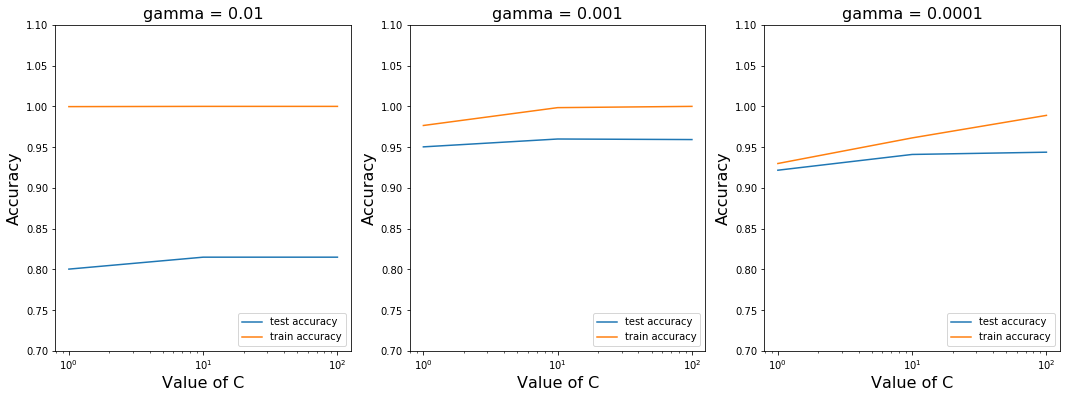

In [54]:
plt.figure(figsize = (18,6))

#subplot 1

plt.subplot(131)

gamma_01 = cv_results[cv_results['param_gamma'] == 0.01]

plt.plot(gamma_01['param_C'],gamma_01['mean_test_score'])
plt.plot(gamma_01['param_C'],gamma_01['mean_train_score'])
plt.xlabel('Value of C',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.title('gamma = 0.01',fontsize = 16)
plt.ylim([0.7,1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

#subplot 2

plt.subplot(132)

gamma_001 = cv_results[cv_results['param_gamma'] == 0.001]

plt.plot(gamma_001['param_C'],gamma_001['mean_test_score'])
plt.plot(gamma_001['param_C'],gamma_001['mean_train_score'])
plt.xlabel('Value of C',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.title('gamma = 0.001',fontsize = 16)
plt.ylim([0.7,1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

#subplot 3

plt.subplot(133)

gamma_0001 = cv_results[cv_results['param_gamma'] == 0.0001]

plt.plot(gamma_0001['param_C'],gamma_0001['mean_test_score'])
plt.plot(gamma_0001['param_C'],gamma_0001['mean_train_score'])
plt.xlabel('Value of C',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.title('gamma = 0.0001',fontsize = 16)
plt.ylim([0.7,1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower right')
plt.xscale('log')

plt.show()

### From the above charts we can see that at higher gamma = 0.01 we have high overfitting. The best choice would be gamma = 0.001  and C = 1

## Getting the predictions from final model

In [55]:
svm_tuned = svm.SVC(kernel= 'rbf', C= 1, gamma= 0.001)

svm_tuned.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
predictions = svm_tuned.predict(X_test)

In [57]:
metrics.confusion_matrix(y_test,predictions)

array([[1313,    0,    6,    0,    3,    2,    6,    0,    3,    0],
       [   0, 1492,   14,    1,    1,    1,    2,    2,    5,    2],
       [   7,    4, 1358,    8,   10,    0,    3,    7,   15,    2],
       [   3,    5,   23, 1381,    0,   20,    0,   12,   19,    8],
       [   2,    1,   16,    0, 1303,    2,    7,    3,    0,   24],
       [   3,    1,   13,   27,    3, 1128,   16,    4,    7,    3],
       [  12,    2,   16,    0,    7,    7, 1346,    0,    7,    0],
       [   0,    9,   21,    7,   16,    1,    0, 1395,    3,   28],
       [   2,    7,   10,   17,    7,   11,    7,    4, 1265,    4],
       [   4,    3,   15,   18,   22,    1,    0,   28,    9, 1248]],
      dtype=int64)

In [58]:
class_report = metrics.classification_report(y_test,predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1333
           1       0.98      0.98      0.98      1520
           2       0.91      0.96      0.93      1414
           3       0.95      0.94      0.94      1471
           4       0.95      0.96      0.95      1358
           5       0.96      0.94      0.95      1205
           6       0.97      0.96      0.97      1397
           7       0.96      0.94      0.95      1480
           8       0.95      0.95      0.95      1334
           9       0.95      0.93      0.94      1348

   micro avg       0.95      0.95      0.95     13860
   macro avg       0.95      0.95      0.95     13860
weighted avg       0.95      0.95      0.95     13860



In [59]:
metrics.accuracy_score(y_test,predictions)

0.9544733044733045

## Now lets make Kaggle predictions with this model

In [60]:
#reading the kaggle test file for digit recognizor challenge

kaggle = pd.read_csv('test_k.csv')

kaggle.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#preprocessing
from sklearn.preprocessing import scale
kaggle = scale(kaggle)



In [63]:
#getting the predicitons
kaggle_pred = svm_tuned.predict(kaggle)

In [64]:
kaggle_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [65]:
output = pd.DataFrame(kaggle_pred)

In [66]:
output.head()

,0
0,2
1,0
2,9
3,4
4,3


In [67]:
#complete 28000 rows
len(output)

28000

In [68]:
#current working directory
pwd

'C:\\Users\\Akseer\\02-Udemy_Kaggle_my_practice\\SVM'

In [69]:
#export the predictions to a csv file. 
output.to_csv('C:\\Users\\Akseer\\02-Udemy_Kaggle_my_practice\\SVM\\kaggle_challenge.csv')

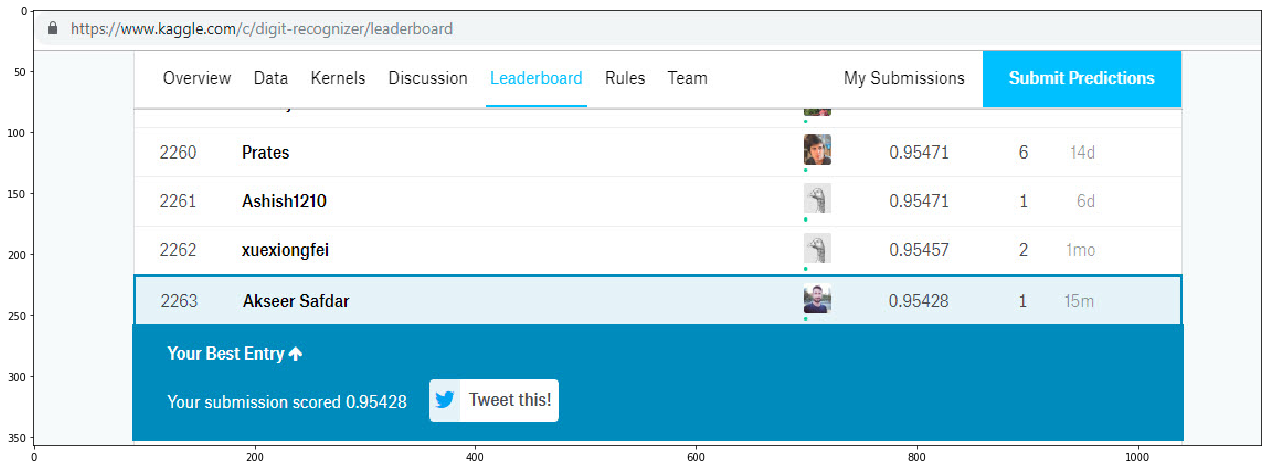

In [77]:
#congrats we have predicted with 95% accuracy
plt.figure(figsize = (22,8))
image = plt.imread('kaggle_leaderboard.jpg')
plt.imshow(image, interpolation='nearest', aspect='auto')
plt.show()